# CNN fashionmnist

## Import

In [1]:
!pip install --q ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.8 MB/s eta 0:00:00
time: 436 µs (started: 2024-07-01 03:11:54 +00:00)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-pastel')
import seaborn as sns

import tensorflow as tf
import keras

time: 7.42 s (started: 2024-07-01 03:11:54 +00:00)


## 데이터 불러오기

In [3]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step
time: 3.04 s (started: 2024-07-01 03:12:01 +00:00)


In [4]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
time: 1.04 ms (started: 2024-07-01 03:12:04 +00:00)


In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

time: 17.9 ms (started: 2024-07-01 03:12:04 +00:00)


In [6]:
# 0 ~ 번호별 사진 이름
columns = ['T-shirt/top', 'Trouser',  'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

time: 522 µs (started: 2024-07-01 03:12:04 +00:00)


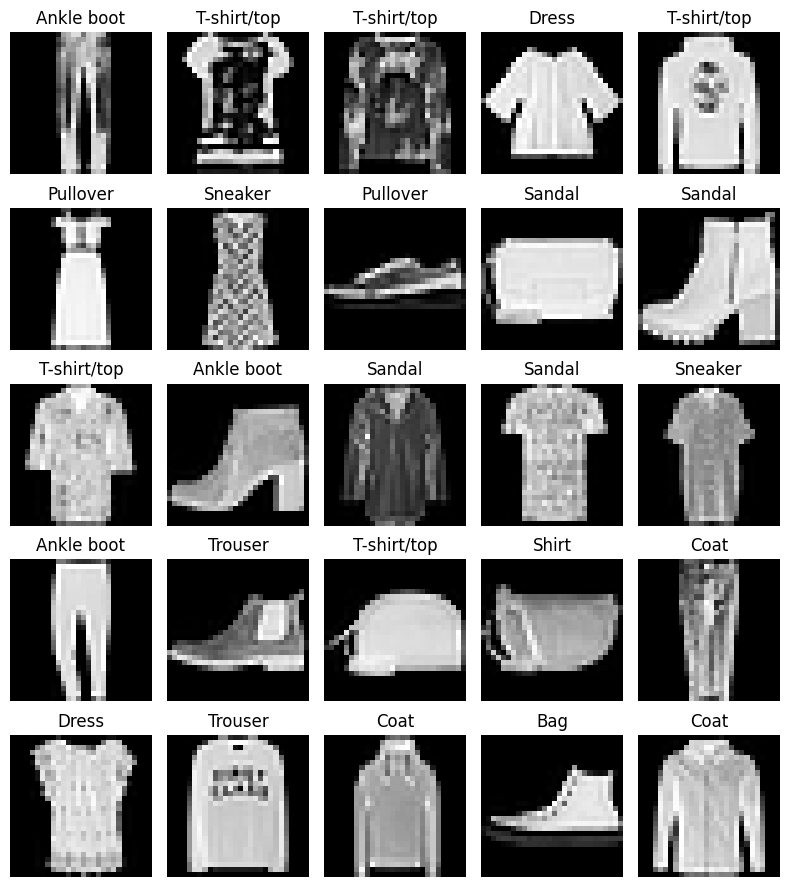

time: 3.71 s (started: 2024-07-01 03:12:04 +00:00)


In [7]:
np.random.seed(42)
sample = np.random.randint(60000,size = 25)
sample

plt.figure(figsize=(8,9))

for i, idx in enumerate(sample):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.axis('off')
    plt.title(columns[y_train[i]])
plt.tight_layout()
plt.show()

In [8]:
pd.Series(y_train).value_counts().sort_index()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: count, dtype: int64

time: 51.2 ms (started: 2024-07-01 03:12:08 +00:00)


## 학습, 검증 데이터 분리

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)
time: 441 ms (started: 2024-07-01 03:12:08 +00:00)


## 데이터 전처리

### X_train, X_val minmax 스케일링

In [10]:
from sklearn.preprocessing import MinMaxScaler

X_train_s = X_train / 255.
X_val_s = X_val / 255.

time: 323 ms (started: 2024-07-01 03:12:09 +00:00)


In [11]:
X_train_s.shape, X_val_s.shape

((48000, 28, 28), (12000, 28, 28))

time: 6.59 ms (started: 2024-07-01 03:12:09 +00:00)


### y_train, y_val 원-핫 인코딩

In [12]:
from keras.utils import to_categorical

y_train_o = to_categorical(y_train)
y_val_o = to_categorical(y_val)

time: 9.61 ms (started: 2024-07-01 03:12:09 +00:00)


In [13]:
y_train_o.shape, y_val_o.shape

((48000, 10), (12000, 10))

time: 10.2 ms (started: 2024-07-01 03:12:09 +00:00)


## Model 학습

### cnn 모델

In [14]:
X_train_s = X_train_s.reshape(-1,28,28,1) # 색깔 축 추가 컬러는 3, 흑백은 1
X_train_s.shape

(48000, 28, 28, 1)

time: 6.55 ms (started: 2024-07-01 03:12:09 +00:00)


In [15]:
X_val_s = X_val_s.reshape(-1,28,28,1)
X_val_s.shape

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.00784314],
         [0.        ],
         [0.43921569],
         ...,
         [0.        ],
         [0.        ],
         [0.00392157]],

        [[0.00784314],
         [0.        ],
         [0.08235294],
         ...,
         [0.        ],
         [0.00392157],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

time: 15.4 ms (started: 2024-07-01 03:12:09 +00:00)


In [16]:
from keras import layers

model = keras.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"),
    # 여기까지 분류기 -----------------------------------------------------
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
keras.utils.plot_model(model)

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

time: 72.7 ms (started: 2024-07-01 03:12:11 +00:00)


In [18]:
print(X_train_s.shape, y_train_o.shape)
print(X_val_s.shape, y_val_o.shape)

(48000, 28, 28, 1) (48000, 10)
(12000, 28, 28, 1) (12000, 10)
time: 5.03 ms (started: 2024-07-01 03:12:11 +00:00)


In [19]:
EPOCHS = 30
BATCH_SIZE = 32

history = model.fit(X_train_s,y_train_o, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val_s,y_val_o))

Epoch 1/30
1500/1500 [==============================] - 23s 9ms/step - loss: 0.5247 - acc: 0.8092 - val_loss: 0.4121 - val_acc: 0.8507
Epoch 2/30
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3499 - acc: 0.8746 - val_loss: 0.3116 - val_acc: 0.8857
Epoch 3/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3017 - acc: 0.8888 - val_loss: 0.2919 - val_acc: 0.8905
Epoch 4/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2713 - acc: 0.9005 - val_loss: 0.2781 - val_acc: 0.8962
Epoch 5/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2488 - acc: 0.9083 - val_loss: 0.2770 - val_acc: 0.8970
Epoch 6/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2287 - acc: 0.9157 - val_loss: 0.2599 - val_acc: 0.9069
Epoch 7/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2113 - acc: 0.9212 - val_loss: 0.2510 - val_acc: 0.9082
Epoch 8/30
1500/1500 [==============================] - 8s 

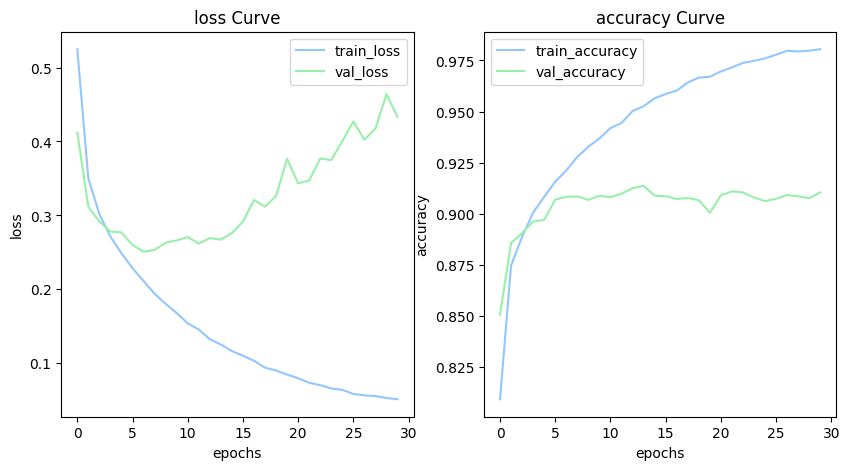

time: 933 ms (started: 2024-07-01 03:18:52 +00:00)


In [21]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'],hist['loss'],label='train_loss')
    plt.plot(hist['epoch'],hist['val_loss'],label='val_loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'],hist['acc'],label='train_accuracy')
    plt.plot(hist['epoch'],hist['val_acc'],label='val_accuracy')
    plt.title('Accuracy Curve')
    plt.legend()

    plt.show()

plot_history(history)

## Test 데이터 예측

In [22]:
X_test_s = X_test / 255.
X_test_s = X_test_s.reshape(-1,28,28,1)

time: 32.9 ms (started: 2024-07-01 03:19:05 +00:00)


In [23]:
y_pred = model.predict(X_test_s)
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 3ms/step
time: 1.45 s (started: 2024-07-01 03:19:06 +00:00)


In [24]:
print(X_test_s.shape, y_test.shape)

(10000, 28, 28, 1) (10000,)
time: 1.13 ms (started: 2024-07-01 03:19:07 +00:00)


accuracy :  0.9051
recall :  0.9051
precision :  0.9058340487461475
f1 :  0.9052889994443529
-------------------------------------------------------


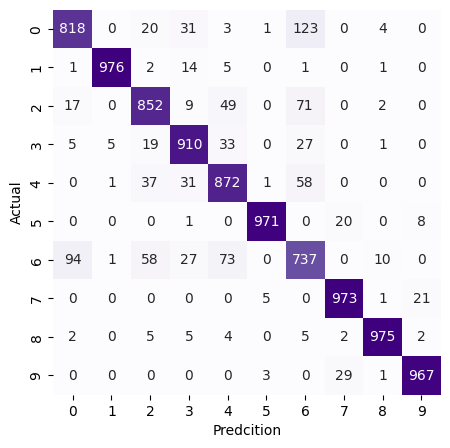

time: 364 ms (started: 2024-07-01 03:19:07 +00:00)


In [25]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def print_metrics(y_true, y_pred, aver='binary'):
    print('accuracy : ', accuracy_score(y_true, y_pred))
    print('recall : ', recall_score(y_true, y_pred, average=aver))
    print('precision : ', precision_score(y_true, y_pred, average=aver))
    print('f1 : ', f1_score(y_true, y_pred, average=aver))
    print('-----'*11)
    cfm = confusion_matrix(y_true,y_pred)
    plt.figure(figsize = (5,5))
    s = sns.heatmap(cfm, annot=True, fmt='d', cbar=False, cmap='Purples')
    s.set(xlabel='Predcition', ylabel='Actual')
    plt.show()

print_metrics(y_test,y_pred,'macro')

In [28]:
columns

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

time: 9.13 ms (started: 2024-07-01 03:21:54 +00:00)


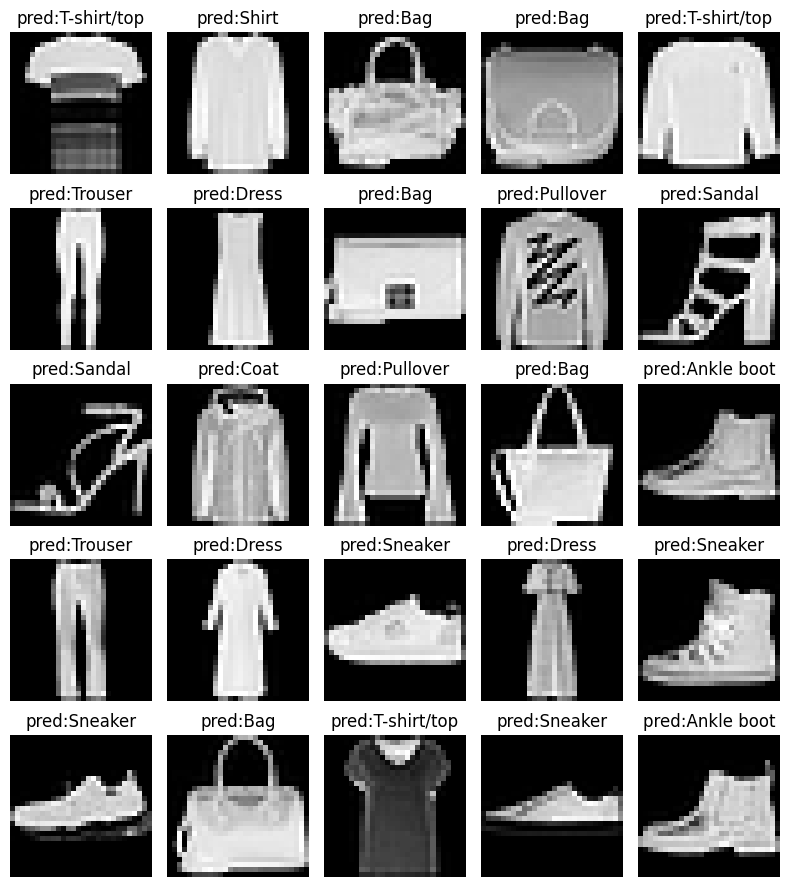

time: 2.79 s (started: 2024-07-01 03:23:06 +00:00)


In [30]:
np.random.seed(42)
sample = np.random.randint(10000,size = 25)
sample

plt.figure(figsize=(8,9))

for i, idx in enumerate(sample):
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.axis('off')
    plt.title(f'pred:{columns[y_pred[idx]]}')
plt.tight_layout()
plt.show()

## Model 저장

In [ ]:
# model 저장 후 전송 가능
#model.save('cnn_multi_fashion.h5')
#model.save('cnn_multi_fashion.keras')

In [ ]:
# 폴더 형식으로 저장
#model.save('cnn_multi_fashion')

## Model 불러오기

In [ ]:
#keras.saving.load_model('')